## Building a brain for dummies

Artificial neural networks, despite the name, are still very different from how brains work. Most networks are trained using top-down gradient-based methods that are not remotely biologically realistic. Training a state-of-the-art deep learning model such as GTP-3 or DALL-E2 can cost millions of dollars and requires specific infrastructure to deploy. Meanwhile, our brains generate general intelligence, trained in an unsupervised way. The brain has an energy consumption of about 20 Watt, which is about three cans of coke a day. Brains are remarkably efficient.

Hyperdimensional computing (HDC) is a relatively new approach to artificial intelligence. It tries to mimic some aspects of brain functioning more closely. Here, we compute with hyperdimensional vectors (HDV), which is merely a fancy name for vectors of huge dimensionality, typically 10,000. Each HDV can represent a concept, for example, a word in a language, a position along an axis, an ingredient in a recipe or an atom in a molecule. Using a set of basic, well-chosen operations, one can combine these atomic vectors into new vectors: from words to sentences, from coordinates to a position in space, from ingredients to a recipe. These rules allow the user to create *structured* and *hierarchical* representations of whatever they want to model. 

Hyperdimensional computing exploits the power of high dimensions by smearing out the information over the complete vector. A distributed, holographic representation allows building a remarkably robust and efficient learning system. Because HDC can be computed using efficient bit-operations, it can be made very energy-efficient. Furthermore, a basic HDC system is relatively easy to implement, as we will see. 

## Building blocks of HDC

To build a HDC system we need the following building blocks:
1) HDVs themselves. These HDVs are just ordinary vectors. 
2) Suited arithmetic operations to manipulate these vectors.
3) Metrics to compute similarities between HDVs.

In [28]:
# base modules
import random
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import pandas as pd


In [29]:
N = 10000

### Generating hyperdimensional vectors

Hyperdimensional vectors are nothing more than vectors of a very high dimension. The dimensionality should be sufficiently large that one can comfortably store all the concepts of the system of interest. For our system to be robust, the space of vectors should also be large enough that *a randomly-drawn vector is almost surely unrelated to meaningful vectors*. In this notebook, we work with a dimensionality of $N =$ $N.

In [30]:
def hdv() -> np.ndarray:
    return np.random.choice([-1, 1], size=N)

We expect about half of the elements of two randomly-chosen vectors to match.

Our two randomly generated vectors show that about half of the $N$ elements match. The expected value is $N/2$, with a variance ($\sigma^2$) of $N/4$ and thus the standard deviation ($\sigma$) is $\sqrt{N}/2$. 

> Any two randomly chosen HDV likely share between $(N-3\sqrt{N})$ and $(N+3\sqrt{N})$ elements.

When we need a set of `n` vectors, it makes sense to generate a matrix in one go.

In [31]:
def hdv_m(rows: int) -> NDArray:
    return np.random.choice([-1, 1], size=(rows, N))

In [32]:
x = hdv()  # a HDV!
x

array([ 1, -1, -1, ..., -1,  1,  1], shape=(10000,))

In [33]:
y = hdv()  # another one!
y

array([ 1,  1,  1, ..., -1, -1, -1], shape=(10000,))

In [34]:
np.sum(x == y)

np.int64(4982)

In [35]:
V = hdv_m(10)  # each row is a HDV
V

array([[ 1,  1,  1, ..., -1,  1,  1],
       [ 1, -1, -1, ...,  1, -1,  1],
       [ 1,  1, -1, ..., -1,  1, -1],
       ...,
       [ 1,  1, -1, ..., -1, -1, -1],
       [ 1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ...,  1,  1,  1]], shape=(10, 10000))

### Bundling

Our first operation is **bundling** or aggregation. This operation combines two or more HDVs in a new HDV that *is similar to all elements in the set*. For bipolar vectors, the element-wise majority fits the bill. Note that when we bundle two HDVs, many of the elements will be set to zero, indicating that the corresponding elements of the parents were in disagreement. 

In [36]:
def bundle_m(U: NDArray[int]) -> NDArray[int]:
    if U.ndim != 2:
        raise ValueError("U must be a 2d array.")

    return np.sign(np.sum(U, axis=0))

# example
U = np.array([[1, 2],
              [-3, 4],
              [50000, -6]])

result = bundle_m(U)
print(result)

[1 0]


In [37]:
def bundle(*xs: NDArray[int]) -> NDArray[int]:
    summed = np.add.reduce(xs)
    return np.sign(summed)

# example
xs = bundle(np.array([1, 2]),
            np.array([-3, 4]),
            np.array([5, -6]))
print(xs)

[1 0]


In [38]:
bundle(x, y)

array([ 1,  0,  0, ..., -1,  0,  0], shape=(10000,))

In [39]:
bundle_m(V)  # bundling makes most sense to find agreement among several HDVs

array([1, 1, 1, ..., 1, 1, 1], shape=(10000,))

### Binding

The second operator is **binding**: combining two vectors in a new vector different from both. Bundling encodes an *interaction* between two concepts. For bipolar vectors, element-wise multiplication has the desired properties. When two elements are in agreement ((-1, -1) or (1, 1)), the result will be 1. When they are in disagreement ((-1, 1) or (-1, 1)), the result will be -1. One typically uses the XOR function for binary vectors, generating a `true` only when the input bits differ.

In [40]:
def bind(*xs: NDArray[int]):
    return np.multiply.reduce(xs)

# example
xs = bind(np.array([1, 2]), np.array([-3, 4]), np.array([5, -6]))
bind(xs)

array([-15, -48])

In [41]:
bind(x, y)

array([ 1, -1, -1, ...,  1, -1, -1], shape=(10000,))

Binding is reversible:

In [42]:
np.array_equal(bind(bind(x, y), y),
               x)

True

In [43]:
np.array_equal(bind(bind(x, y), x), y)

True

### Shifting

Our last operation to create new vectors is a simple unitary one that can create a new HDV from an old one by shifting its elements. For example, this is important when one wants to include positional information (e.g., in a sentence). An easy trick is to perform **shifting** using cyclic permutation. Just move every element of the HDV one or more steps to the right. Elements that fall off are placed back at the beginning. 

In [44]:
def shift(x, k=1):
    return np.roll(x, k)

# example
shift([1, 2, 3])

array([3, 1, 2])

In [45]:
shift(x)

array([ 1,  1, -1, ...,  1, -1,  1], shape=(10000,))

In [46]:
  # shifted vector only shares half its elements with the old one
sum(a == b for a, b in zip(x, shift(x)))

np.int64(4972)

### Similarity between HDVs

Finally, we need a way to quantify the **similarity** between two HDVs. This will allow us to detect related patterns. A simple way would be to count the number of matching bits, which we have shown to be expected around $N/2$ for two randomly drawn HDVs. 

For bipolar HDV, the **cosine similarity** is a good similarity measure:

$$\cos(\mathbf{x}, \mathbf{y}) = \frac{\mathbf{x} \cdot \mathbf{y}}{||\mathbf{x}||\, ||\mathbf{y}||}\,.$$

The cosine similarity always lies between -1 and 1.

In [47]:
def cos_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

# example
cos_similarity([1, 2, 3],
               [4, 5, 6])

np.float64(0.9746318461970762)

In [48]:
cos_similarity(x, y)  # random vectors, so close to 0 (almost orthogonal)

np.float64(-0.0036)

### Properties of the operations

Bundling, binding, and shifting allow for meaningful computation on the concepts your HDVs represent. One vital property of binding and shifting possess is that they are *reversible*: applying them does not remove any information. Binding also distributes over bundling:

In [49]:
z = hdv()

In [50]:
np.array_equal(bind(x, bundle(y, z)),
               bundle(bind(x, y), bind(x, z)))

True

This means that transforming a bundle of concepts with binding is equivalent to binding every element before bundling.

Binding also preserves distance and similarity.

In [51]:
np.array_equal(cos_similarity(x,y),
               cos_similarity(bind(x, z), bind(y, z)))

True

Similarly, permutation or shifting also perserves the similarity between two vectors.

In [52]:
np.array_equal(cos_similarity(x,y),
               cos_similarity(shift(x), shift(y)))

True

## The blessing of high dimensions

While some machine learning methods reduce dimensionality, the magic of HDC arises by *expanding* the dimensionality. Feature expansion is far from a novel concept: deep learning does it, kernel methods do it etc. Moving your problem to vast dimensionality can make it easier to solve. You could comfortably fit, for example, all of organic chemistry in such a system. The vast majority of the vectors in such a space are uncorrelated, as shown below.

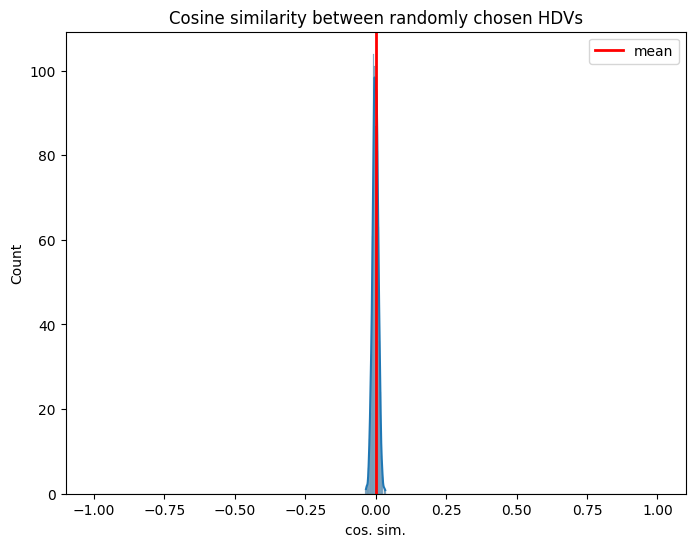

In [96]:
data = [cos_similarity(hdv(), hdv()) for _ in range(1000)]

plt.figure(figsize=(8,6))
seaborn.histplot(data, binrange=(-1, 1), kde=True)

# Configuración del gráfico
plt.xlabel("cos. sim.")
plt.title("Cosine similarity between randomly chosen HDVs")

# Línea vertical en 0
plt.axvline(x=0, color='red', linewidth=2, label='mean')
plt.legend()
plt.show()

As you can see, most HDVs are approximately orthogonal to one other. This implies  that when two vectors *are* related (share substantially more than 50% of their bits), this is a good indication that they are related semantically! To put a number on this, there is less than a one per cent chance that two random HDVs share more dan 5500 bits, corresponding to a cosine similarity of 0.05. This makes HDC very sensitive to picking up related concepts.

Every vector also has billions of neighbours that differ only a few bits. So, x and y may be both related to z, while x and y themselves are unrelated. This property allows one to build semantic links in the space. Bird and sock might be unrelated, but they can be conceptually linked as bird ~ chicken ~ drumstick ~ leg ~ foot ~ sock.

## Examples

Let us explore some didactic examples to show how objects, numbers, colours, and sequences can be represented as HDVs and how we can learn with them.

### Example 1: colour matching

Let us start with a simple toy example. We have a list of emojis, each with associated colours. Can we find the *average* colour per emoji?

Take a look at the data.

In [54]:
import seaborn

n_colors = 50
reds = seaborn.color_palette("Reds", n_colors=n_colors)
blues = seaborn.color_palette("Blues", n_colors=n_colors)
greens = seaborn.color_palette("Greens", n_colors=n_colors)
oranges = seaborn.color_palette("Oranges", n_colors=n_colors)
greys = seaborn.color_palette("Greys", n_colors=n_colors)
yellows = seaborn.light_palette("Yellow", n_colors=n_colors)
whites = seaborn.light_palette("White", n_colors=n_colors)

emojis_colors = {
    '🚒': reds,
    '💦': blues,
    '🌱': greens,
    '🌅': oranges,
    '🐺': greys,
    '🍌': yellows,
    '🥚': whites
}

emojis = list(emojis_colors.keys())

toy_data1 = [(emoji := random.choice(emojis), random.choice(emojis_colors[emoji]))
             for _ in range(100)]

reds

[(0.9993848519800077, 0.9478662053056517, 0.922722029988466),
 (0.9987697039600154, 0.9349480968858132, 0.9042675893886967),
 (0.9981545559400231, 0.9220299884659746, 0.8858131487889274),
 (0.9975394079200308, 0.9091118800461361, 0.867358708189158),
 (0.9969242599000384, 0.8961937716262975, 0.8489042675893886),
 (0.9963091118800461, 0.883275663206459, 0.8304498269896193),
 (0.9953094963475586, 0.8642060745866974, 0.8046905036524413),
 (0.994079200307574, 0.8414455978469819, 0.7745482506728181),
 (0.9928489042675894, 0.8186851211072664, 0.7444059976931949),
 (0.9916186082276048, 0.795924644367551, 0.7142637447135717),
 (0.9903883121876201, 0.7731641676278354, 0.6841214917339484),
 (0.9891580161476355, 0.75040369088812, 0.6539792387543253),
 (0.9882352941176471, 0.7270280661284121, 0.6241445597846982),
 (0.9882352941176471, 0.7018069973087273, 0.5952326028450596),
 (0.9882352941176471, 0.6765859284890426, 0.566320645905421),
 (0.9882352941176471, 0.6513648596693579, 0.5374086889657824),
 (0.9882352941176471, 0.6261437908496732, 0.5084967320261438),
 (0.9882352941176471, 0.6009227220299885, 0.4795847750865053),
 (0.9882352941176471, 0.5757016532103036, 0.4506728181468666),
 (0.9876970396001539, 0.5510188389081122, 0.4255286428296809),
 (0.9870818915801615, 0.5264129181084198, 0.40092272202998847),
 (0.9864667435601692, 0.5018069973087274, 0.3763168012302961),
 (0.9858515955401769, 0.477201076509035, 0.3517108804306036),
 (0.9852364475201845, 0.4525951557093426, 0.32710495963091124),
 (0.9846212995001922, 0.42798923490965013, 0.30249903883121876),
 (0.9806228373702421, 0.40123029603998467, 0.2809688581314879),
 (0.9732410611303345, 0.37231833910034606, 0.2625144175317186),
 (0.9658592848904267, 0.34340638216070746, 0.24405997693194925),
 (0.9584775086505191, 0.31449442522106885, 0.22560553633217995),
 (0.9510957324106113, 0.2855824682814302, 0.2071510957324106),
 (0.9437139561707035, 0.25667051134179164, 0.18869665513264128),
 (0.9344867358708189, 0.2286812764321415, 0.17139561707035755),
 (0.9123414071510957, 0.2071510957324106, 0.1621683967704729),
 (0.8901960784313725, 0.18562091503267975, 0.15294117647058825),
 (0.8680507497116493, 0.16409073433294888, 0.14371395617070357),
 (0.8459054209919262, 0.14256055363321812, 0.13448673587081897),
 (0.8237600922722029, 0.12103037293348712, 0.12525951557093426),
 (0.8016147635524797, 0.09950019223375625, 0.1160322952710496),
 (0.7785467128027681, 0.08996539792387544, 0.11003460207612456),
 (0.7551710880430603, 0.08442906574394464, 0.10511341791618607),
 (0.7317954632833525, 0.07889273356401384, 0.10019223375624758),
 (0.7084198385236448, 0.07335640138408304, 0.09527104959630911),
 (0.685044213763937, 0.06782006920415225, 0.09034986543637061),
 (0.6616685890042292, 0.06228373702422145, 0.08542868127643213),
 (0.6327566320645905, 0.05536332179930796, 0.08050749711649365),
 (0.5946174548250673, 0.04613610149942329, 0.07558631295655516),
 (0.556478277585544, 0.03690888119953864, 0.07066512879661667),
 (0.5183391003460208, 0.02768166089965398, 0.06574394463667818),
 (0.4801999231064975, 0.01845444059976932, 0.06082276047673971),
 (0.44206074586697425, 0.00922722029988466, 0.05590157631680122)]

Encoding emojis is easy! There are only 7 of them. Let us give them all a unique HDV.

In [55]:
emojis

['🚒', '💦', '🌱', '🌅', '🐺', '🍌', '🥚']

In [56]:
emojis_hdvs = {emoji: hdv() for emoji in emojis}

Colors are a bit more tricky. This is an example color:

In [57]:
def randcol():
    return np.random.rand(3)

def show_color(color):
    plt.figure(figsize=(1,1))
    plt.imshow([[color]])
    plt.axis('off')
    plt.show()

acolor = randcol()
acolor


array([0.72799079, 0.92992741, 0.70696035])

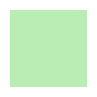

In [58]:
show_color(acolor)

We see that a colour can be represented by three numbers: the fractions of red, green, and blue. Every value is just a number between 0 and 1. If we can construct an embedding for numbers, we can represent a colour as a *binding* of three numbers.

Representing numbers in a fixed interval $[a, b]$ with HDVs is relatively easy. We first divide the interval into $k$ equal parts. Then, we generate an HDV representing the lower bound of the interval. We replace a fraction of $1/k$ of the previous vector for every step with fresh random bits.

In [59]:
def range_hdvs(steps):
    k = len(steps) - 1

    V = hdv_m(k + 1)  # V size is (k+1)xN

    for i in range(1, k + 1):  # for each other row/step
        for j in range(N):     # for each column
            V[i, j] = -V[i-1, j] if random.random() < (1 / k) else V[i-1, j]

    return V


Let us represent a color chanel from 0 to 1 in steps of 0.05. This resolution should suffice.

In [60]:
color_steps = np.arange(0, 1.05, 0.05)

In [61]:
reds_hdv = range_hdvs(color_steps)

Take a look at the correlation. HDVs that represent numbers closer to onother are more similar:

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
V0,0.1202,0.1322,0.1414,0.1544,0.1780,0.1878,0.2100,0.2386,0.2742,0.3040,...,0.3698,0.4134,0.4738,0.5286,0.5932,0.6530,0.7328,0.8082,0.8956,1.0000
V1,0.1282,0.1390,0.1514,0.1676,0.1948,0.2066,0.2320,0.2622,0.2974,0.3268,...,0.3998,0.4514,0.5174,0.5838,0.6548,0.7234,0.8144,0.8998,1.0000,0.8956
V2,0.1444,0.1580,0.1732,0.1898,0.2158,0.2300,0.2602,0.2944,0.3368,0.3734,...,0.4488,0.5052,0.5784,0.6520,0.7306,0.8080,0.9062,1.0000,0.8998,0.8082
V3,0.1618,0.1754,0.1954,0.2120,0.2396,0.2586,0.2900,0.3286,0.3694,0.4116,...,0.5022,0.5634,0.6410,0.7210,0.8064,0.8906,1.0000,0.9062,0.8144,0.7328
V4,0.1760,0.1912,0.2168,0.2362,0.2722,0.2952,0.3318,0.3748,0.4152,0.4630,...,0.5652,0.6336,0.7188,0.8100,0.9054,1.0000,0.8906,0.8080,0.7234,0.6530
V5,0.1990,0.2158,0.2430,0.2640,0.3032,0.3314,0.3704,0.4194,0.4622,0.5160,...,0.6314,0.7050,0.7958,0.8978,1.0000,0.9054,0.8064,0.7306,0.6548,0.5932
V6,0.2216,0.2436,0.2748,0.3014,0.3450,0.3804,0.4238,0.4760,0.5248,0.5834,...,0.7116,0.7908,0.8892,1.0000,0.8978,0.8100,0.7210,0.6520,0.5838,0.5286
V7,0.2428,0.2688,0.3064,0.3354,0.3818,0.4252,0.4718,0.5332,0.5892,0.6546,...,0.8024,0.8920,1.0000,0.8892,0.7958,0.7188,0.6410,0.5784,0.5174,0.4738
V8,0.2724,0.3036,0.3408,0.3746,0.4250,0.4768,0.5282,0.5940,0.6604,0.7346,...,0.8996,1.0000,0.8920,0.7908,0.7050,0.6336,0.5634,0.5052,0.4514,0.4134
V9,0.3112,0.3484,0.3904,0.4294,0.4838,0.5408,0.5974,0.6648,0.7380,0.8178,...,1.0000,0.8996,0.8024,0.7116,0.6314,0.5652,0.5022,0.4488,0.3998,0.3698


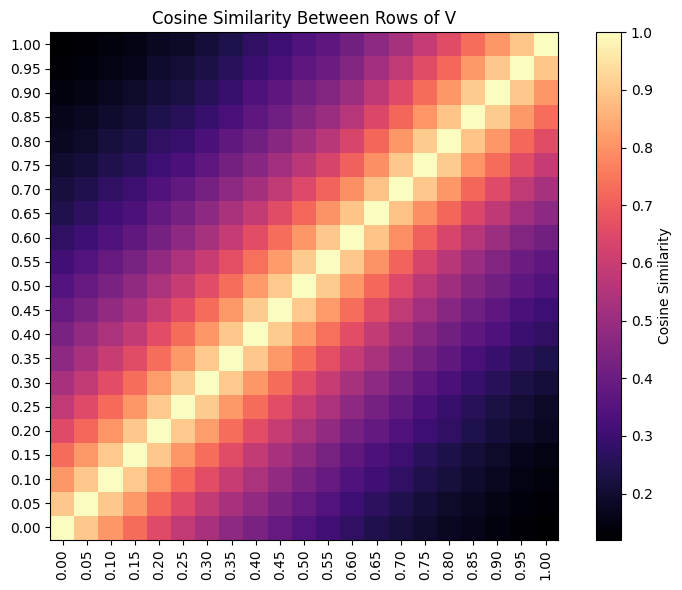

In [62]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la matriz de similaridad coseno
cos_sim_matrix = cosine_similarity(reds_hdv)
cos_sim_matrix = cos_sim_matrix[::-1, :]

# Representar la matriz de similaridad como DataFrame para mejor visualización
df_cos_sim = pd.DataFrame(cos_sim_matrix,
                          index=[f"V{i}" for i in range(reds_hdv.shape[0])],
                          columns=[f"V{i}" for i in range(reds_hdv.shape[0])])

# Mostrar en formato tabla
display(df_cos_sim)

# Representar la matriz de similaridad coseno con un mapa de calor
plt.figure(figsize=(8, 6))
plt.imshow(cos_sim_matrix, cmap='magma', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title("Cosine Similarity Between Rows of V")
plt.xticks(ticks=np.arange(len(color_steps)),
           labels=[f"{val:.2f}" for val in color_steps], rotation=90)
plt.yticks(ticks=np.arange(len(color_steps)),
           labels=[f"{val:.2f}" for val in color_steps[::-1]])

plt.tight_layout()
plt.show()


Repeat for green and blue. It is important we have fresh HDVs so that our channels are orthogonal!

In [63]:
greens_hdv = range_hdvs(color_steps)
blues_hdv = range_hdvs(color_steps)

A colour is just a triple of the RGB channel (other representations such as hue-value-saturation might be better, but RGB works fine for our purposes). We can create a colour HDV by binding the three channel-HDVs.

In [64]:
def col_ind(component):
    return round(component * 20)

def encode_col(color):
    return bind(reds_hdv[col_ind(color[0])],
                greens_hdv[col_ind(color[1])],
                blues_hdv[col_ind(color[2])])

Try it on our example colour:

In [65]:
colhdv = encode_col(acolor)

Mapping from colour to HDV is straightforward. The big question is, can we do the reverse: *going from HDV to the corresponding colour*? This is an inverse problem and is generally difficult to solve. We will deal with the issue by using a simple *table lookup*:

1. generate a list of many random colours;
2. get the HDV for each colour;
3. to map a new HDV $\mathbf{x}$ to a colour, just look for the most similar colour in the database using the cosine similarity and return it.

In [66]:
ref_colors = [{'color':c, 'hdv':encode_col(c)} for c in [randcol() for _ in range(1000)]]

In [67]:
def decode_colors(v):
    best_match = max(ref_colors, key=lambda item: cos_similarity(v, item["hdv"]))
    show_color(best_match["color"])
    return best_match["color"]

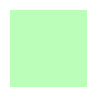

array([0.7344048 , 0.9969753 , 0.73179958])

In [68]:
decode_colors(colhdv)  # we more or less recover the color!

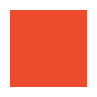

array([0.92893778, 0.29814243, 0.17841917])

In [69]:
decode_colors(hdv())  # decoding a random HDV

Now that we can encode emoji and colours, we can represents couples with yet another binding operation. Subsequently, we can embed the complete dataset by bundling.

In [70]:
def encode_emoji_col_pair(s, c):
    return bind(emojis_hdvs[s], encode_col(c))

In [71]:
col_emoji_hdvs = [encode_emoji_col_pair(s, c) for s, c in toy_data1]

In [72]:
toy_data_emb = bundle(*col_emoji_hdvs)

From the dataset embedding, we can now extract all the 'average' colours for each emoji. Remember, by binding again with the fire truck, we reverse the initial binding.

In [73]:
bind(toy_data_emb, emojis_hdvs['🚒'])

array([-1,  1, -1, ...,  1, -1, -1], shape=(10000,))

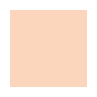

array([0.98460592, 0.84062398, 0.7447655 ])

In [74]:
decode_colors(bind(toy_data_emb, emojis_hdvs['🚒']))

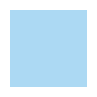

array([0.67665782, 0.85224162, 0.95615608])

In [75]:
decode_colors(bind(toy_data_emb, emojis_hdvs['💦']))

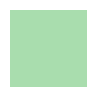

array([0.66556001, 0.86709638, 0.68579243])

In [76]:
decode_colors(bind(toy_data_emb, emojis_hdvs['🌱']))

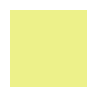

array([0.93049946, 0.94676454, 0.54261423])

In [77]:
decode_colors(bind(toy_data_emb, emojis_hdvs['🍌']))

### Example 1.1: color matching with noise

This seems to work quite well! Let us move to a variation to this problem. With every emoji, we now give *three* colours: one is related to the emoji (we don't know which one), and two are randomly generated. Can we still find the matching colour?

In [78]:
# Data required for this example

toy_data2 = [
    (
        emoji := random.choice(emojis),
        random.sample(
            [
                random.choice(emojis_colors[emoji]),
                randcol(),
                randcol()
            ],
            3
        )
    )
    for _ in range(500)
]

This is an example of a *multi-instance problem*: for every observation, we have several labels, and we know at least one is relevant. It pops up frequently in weakly-supervised learning, for example, when you have an image containing multiple objects with only a label for the image or when a molecule has different configurations, knowing that at least one is chemically active.

For HDC, dealing with multi-instance learning is a breeze. We can bundle the different colours. Due to distributivity, the irrelevant colours will act as noise and will be averaged away when bundling the complete data.

In [79]:
def encode_shape_col_pair2(s, colors):
    return bind(emojis_hdvs[s], bundle(*map(encode_col, colors)))

In [80]:
toy_data_emb2 = bundle(*[encode_shape_col_pair2(s, colors) for s, colors in toy_data2])

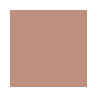

array([0.74281732, 0.56107145, 0.49665406])

In [81]:
decode_colors(bind(toy_data_emb2, emojis_hdvs['🚒']))

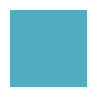

array([0.31432533, 0.67483101, 0.75706068])

In [82]:
decode_colors(bind(toy_data_emb2, emojis_hdvs['💦']))

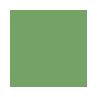

array([0.45830898, 0.64205126, 0.39960298])

In [83]:
decode_colors(bind(toy_data_emb2, emojis_hdvs['🌱']))

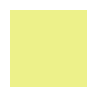

array([0.93049946, 0.94676454, 0.54261423])

In [84]:
decode_colors(bind(toy_data_emb2, emojis_hdvs['🍌']))

Not bad right? Dealing with this issue is quite complex in most machine learning algorithms but HDC gives us the tools to model the structure of our problem.

## Example 2: Recipes